**传统机器学习模型选择**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

def model_choice(user_input):
  if user_input == 1:
    # SVM
    model = SVC()
    return model
  elif user_input == 2:
    # Decision Tree
    model = DecisionTreeClassifier()
    return model
  elif user_input == 3:
    # Random Forest
    model = RandomForestClassifier()
    return model
  elif user_input == 4:
    # Adaptive Boosting Classifer
    model = AdaBoostClassifier()
    return model
  elif user_input == 5:
    # KNN
    model = KNeighborsClassifier()
    return model
  elif user_input == 6:
    # Naïve Bayes
    model = GaussianNB()
    return model
  elif user_input == 7:
    # MLP
    model = MLPClassifier(hidden_layer_sizes=(20,20),learning_rate_init=0.1)
    return model
  elif user_input == 8:
    # Logistic Regression
    model = LogisticRegression()
    return model
  else:
    return None


**训练集与验证集读取**

In [ ]:
  from google.colab import drive
  from sklearn.exceptions import ConvergenceWarning

  drive.mount('/content/gdrive')
  trainset_path = "/content/gdrive/My Drive/Machine Learning Project/train_data.csv"
  test_path = "/content/gdrive/My Drive/Machine Learning Project/test_data.csv"
  trainset = pd.read_csv(trainset_path)
  testset = pd.read_csv(validation_path)

  trainset.info()
  testset.info()

  # Ignore the warning that the model has not converged.
  warnings.filterwarnings("ignore", category=ConvergenceWarning)

  # Training Set Data Preprocessing
  trainset.fillna(trainset.mean(), inplace=True)
  X_train = trainset.drop(['Status'], axis=1)
  Y_train = trainset['Status']

  # validation dataset preprocessing
  testset.fillna(testset.mean(), inplace=True)
  X_test = testset.drop(['Status'],axis=1)
  Y_test = testset['Status']

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112659 entries, 0 to 112658
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loan_amount        112659 non-null  int64  
 1   term               112659 non-null  float64
 2   Credit_Score       112659 non-null  int64  
 3   ncf                112659 non-null  bool   
 4   Joint              112659 non-null  bool   
 5   Male               112659 non-null  bool   
 6   Sex Not Available  112659 non-null  bool   
 7   pre                112659 non-null  bool   
 8   type3              112659 non-null  bool   
 9   p2                 112659 non-null  bool   
 10  p3                 112659 non-null  bool   
 11  p4                 112659 non-null  bool   
 12  l2                 112659 non-null  bool   
 13  nob/c             

**模型选择与预测**

Choose the model ：
1、SVM
2、Decision Tree
3、Random Forest
4、AdaBoostClassifer
5、KNN
6、Naïve Bayes
7、MLP
8、Logistic Regression
3
score for the training set : 0.9999201129070913
score for the test set : 0.9128816457924651
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      9927
           1       0.89      0.94      0.92      9954

    accuracy                           0.91     19881
   macro avg       0.91      0.91      0.91     19881
weighted avg       0.91      0.91      0.91     19881



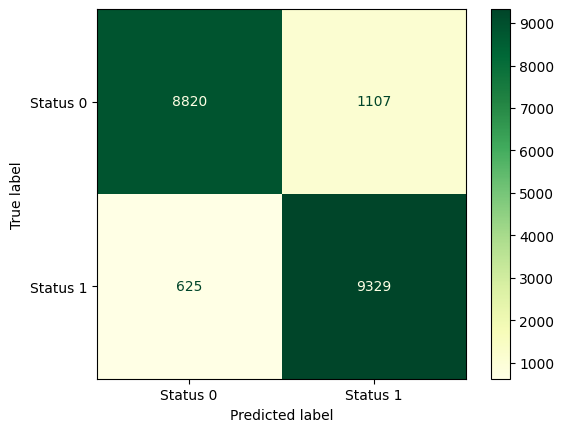

In [ ]:
  from sklearn.metrics import classification_report
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import ConfusionMatrixDisplay
  # from sklearn.metrics import plot_roc_curve

  while True:
    print("Choose the model ：\n1、SVM\n2、Decision Tree\n3、Random Forest\n4、AdaBoostClassifer\n5、KNN\n6、Naïve Bayes\n7、MLP\n8、Logistic Regression")
    user_input = int(input())

    model = model_choice(user_input)

    # Check if the user_input is valid.
    if model == None:
      print("Your choice is invalid. Please repeat input.\n")
    else:
      # Train the model
      model.fit(X_train, Y_train)
      predict_test = model.predict(X_test)

      print("score for the training set :", model.score(X_train, Y_train))
      print("score for the test set :", model.score(X_test, Y_test))
      print(classification_report(Y_test, predict_test))

      labels = ["Status 0", "Status 1"]
      M = confusion_matrix(Y_test, predict_test)
      disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)
      disp.plot(cmap=plt.cm.YlGn)
      plt.show()

      break # 退出